# Module 8 - Logistic Regression

In [299]:
# Basics
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Sampling // Classifier // Metrics
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [300]:
location = "titanic3.xls"

df = pd.read_excel(location)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#### Explore through visualized data

In [301]:
# Useful function to show how the date looks like
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


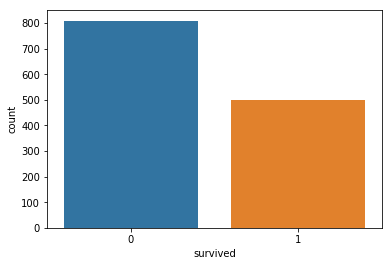

In [302]:
#bar chart of survival status count. We plot the outcome variable to make sure that the date is clean.
sns.countplot(x='survived', data=df)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


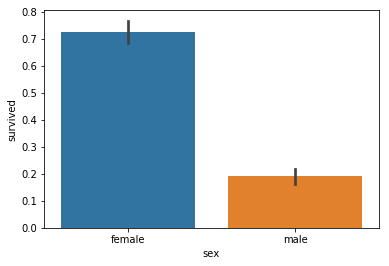

In [303]:
#survival status by sex
sns.barplot('sex', 'survived', data=df)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


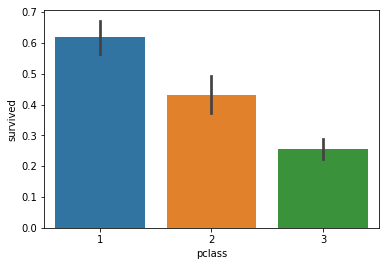

In [304]:
#survival rate by passenger class
sns.barplot('pclass', 'survived', data=df)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0.5,0,'Age')]

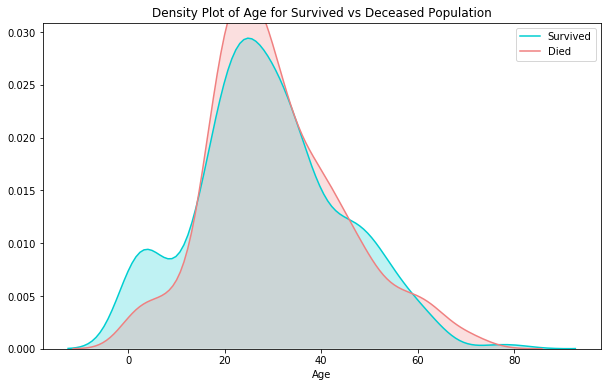

In [305]:
#plot age by survival status
plt.figure(figsize=(10,6))

ax = sns.kdeplot(df['age'][df['survived'] == 1], #passengers that survived
                 color="darkturquoise",
                 shade=True)

sns.kdeplot(df['age'][df['survived'] == 0], #passengers that did not survive
            color="lightcoral",
            shade=True)

plt.legend (['Survived', 'Died'])
plt.title("Density Plot of Age for Survived vs Deceased Population")

ax.set(xlabel='Age')
#plt.show()

#### Handle missing values

In [306]:
#find columns that have missing values
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

Let's clean up 'age' and 'embarked'

In [307]:
#rows where the age is missing
missing_age = df.loc[df['age'].isnull()]
missing_age.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
15,1,0,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY"
37,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S,9,NaN,"Los Angeles, CA"
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,NaN,NaN,"Philadelphia, PA"
46,1,0,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S,NaN,NaN,NaN
59,1,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0,0,17770,27.7208,NaN,C,5,NaN,"New York, NY"


In [308]:
#get index numbers of missing rows - we'll use this later
mals = list(missing_age.index)
print(mals)

[15, 37, 40, 46, 59, 69, 70, 74, 80, 106, 107, 108, 118, 121, 125, 134, 147, 152, 157, 166, 176, 179, 184, 196, 204, 219, 223, 235, 237, 241, 254, 256, 269, 277, 283, 293, 297, 318, 320, 363, 382, 384, 410, 469, 473, 477, 483, 491, 495, 524, 528, 531, 581, 595, 597, 672, 680, 681, 682, 705, 706, 756, 757, 767, 768, 775, 789, 795, 798, 800, 801, 802, 804, 805, 808, 812, 813, 815, 816, 819, 835, 842, 843, 852, 854, 856, 858, 865, 871, 872, 874, 876, 879, 882, 886, 887, 900, 901, 902, 903, 918, 920, 921, 922, 923, 926, 927, 928, 929, 930, 931, 940, 942, 944, 945, 946, 948, 954, 955, 956, 957, 958, 961, 962, 971, 973, 976, 982, 983, 984, 987, 988, 989, 991, 993, 994, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1009, 1012, 1013, 1014, 1016, 1018, 1022, 1023, 1027, 1028, 1029, 1030, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1041, 1042, 1043, 1044, 1052, 1053, 1054, 1055, 1069, 1070, 1071, 1072, 1073, 1074, 1076, 1077, 1078, 1080, 1081, 1085, 1095, 1109, 1114, 1115, 1116, 1

In [309]:
#table of avg age of passenger by survival status, sex, and passenger class
df.groupby(['survived', 'sex', 'pclass'])['age'].mean()

survived  sex     pclass
0         female  1         35.200000
                  2         34.090909
                  3         23.418750
          male    1         43.658163
                  2         33.092593
                  3         26.679598
1         female  1         37.109375
                  2         26.711051
                  3         20.814815
          male    1         36.168240
                  2         17.449274
                  3         22.436441
Name: age, dtype: float64

In [310]:
#fill missing values for age based on survival status, sex, and passenger class
df['age'].fillna(df.groupby(['survived', 'sex', 'pclass'])['age'].transform('mean'), inplace=True)

In [311]:
#verify filled missing values 
df.iloc[mals].head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
15,1,0,"Baumann, Mr. John D",male,43.658163,0,0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY"
37,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,36.168240,0,0,111427,26.5500,NaN,S,9,NaN,"Los Angeles, CA"
40,1,0,"Brewe, Dr. Arthur Jackson",male,43.658163,0,0,112379,39.6000,NaN,C,NaN,NaN,"Philadelphia, PA"
46,1,0,"Cairns, Mr. Alexander",male,43.658163,0,0,113798,31.0000,NaN,S,NaN,NaN,NaN
59,1,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,37.109375,0,0,17770,27.7208,NaN,C,5,NaN,"New York, NY"


In [312]:
df.describe

<bound method NDFrame.describe of       pclass  survived                                               name  \
0          1         1                      Allen, Miss. Elisabeth Walton   
1          1         1                     Allison, Master. Hudson Trevor   
2          1         0                       Allison, Miss. Helen Loraine   
3          1         0               Allison, Mr. Hudson Joshua Creighton   
4          1         0    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
5          1         1                                Anderson, Mr. Harry   
6          1         1                  Andrews, Miss. Kornelia Theodosia   
7          1         0                             Andrews, Mr. Thomas Jr   
8          1         1      Appleton, Mrs. Edward Dale (Charlotte Lamson)   
9          1         0                            Artagaveytia, Mr. Ramon   
10         1         0                             Astor, Col. John Jacob   
11         1         1  Astor, Mrs. John J

In [313]:
#verify there are no more missing age values
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [314]:
#missing values for 'embarked'
embark = df.loc[df['embarked'].isnull()]
embark

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH"


In [315]:
#save index for missing values to verify later
embarkls = list(embark.index)

In [316]:
#only 2 missing values so we'll fill with most common embarkation point
df['embarked'].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [317]:
#fill missing values
df['embarked'].fillna('S', inplace=True)

In [318]:
#check that they're filled
df.iloc[embarkls]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S,6,NaN,NaN
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S,6,NaN,"Cincinatti, OH"


In [319]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        0
boat          823
body         1188
home.dest     564
dtype: int64

Get rid of columns that we don't want to use in the model

In [320]:
def extractTitle(s):
    #s = 'Cairns, Mr. Alexander'
    start = s.find(',') + 2
    end = s.find('.', start)
    return s[start:end]

In [321]:
def extractCabin(s):
    #s = 'Cairns, Mr. Alexander'
    #start = 0
    #end = 1
    return s[:1].upper()

In [323]:
df['title'] = df['name'].apply(extractTitle)   #(df['name'])
df['cabinclass'] = df['name'].apply(extractCabin)   #(df['name'])

df['title'].unique()
df['cabinclass'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'R', 'S', 'T', 'U', 'V', 'W', 'Y', 'Q', 'Z'],
      dtype=object)

In [324]:
df.groupby(['title'])['title'].count()

title
Capt              1
Col               4
Don               1
Dona              1
Dr                8
Jonkheer          1
Lady              1
Major             2
Master           61
Miss            260
Mlle              2
Mme               1
Mr              757
Mrs             197
Ms                2
Rev               8
Sir               1
the Countess      1
Name: title, dtype: int64

In [325]:
modeldf = df.drop(['name','ticket','fare', 'cabin', 'boat', 'body', 'home.dest'], axis=1)

In [326]:
#columns left in our dataframe
modeldf.columns

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'embarked',
       'title', 'cabinclass'],
      dtype='object')

In [327]:
modeldf['title'] = modeldf['title'].map({'Master':0, 'Miss':1, 'Mr': 2, 'Mrs': 3})
modeldf[(modeldf['title'] < 4)]

,pclass,survived,sex,age,sibsp,parch,embarked,title,cabinclass
0,1,1,female,29.000000,0,0,S,1.0,A
1,1,1,male,0.916700,1,2,S,0.0,A
2,1,0,female,2.000000,1,2,S,1.0,A
3,1,0,male,30.000000,1,2,S,2.0,A
4,1,0,female,25.000000,1,2,S,3.0,A
5,1,1,male,48.000000,0,0,S,2.0,A
6,1,1,female,63.000000,1,0,S,1.0,A
7,1,0,male,39.000000,0,0,S,2.0,A
8,1,1,female,53.000000,2,0,S,3.0,A
9,1,0,male,71.000000,0,0,C,2.0,A


Create dummy variables for categorical values

In [328]:
#dummy variables for passenger class embarkation port
#get_dummies will auto-drop columns that dummies were created from
modeldf = pd.get_dummies(data=modeldf, columns=['pclass','embarked', 'title', 'cabinclass'])
modeldf.head()

,survived,sex,age,sibsp,parch,pclass_1,pclass_2,pclass_3,embarked_C,embarked_Q,...,cabinclass_P,cabinclass_Q,cabinclass_R,cabinclass_S,cabinclass_T,cabinclass_U,cabinclass_V,cabinclass_W,cabinclass_Y,cabinclass_Z
0,1,female,29.0000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,male,0.9167,1,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,female,2.0000,1,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,male,30.0000,1,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,female,25.0000,1,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [329]:
#change sex values to binary
#female=0, male=1
modeldf['sex'] = modeldf['sex'].map({'female':0, 'male':1})
modeldf.head()

,survived,sex,age,sibsp,parch,pclass_1,pclass_2,pclass_3,embarked_C,embarked_Q,...,cabinclass_P,cabinclass_Q,cabinclass_R,cabinclass_S,cabinclass_T,cabinclass_U,cabinclass_V,cabinclass_W,cabinclass_Y,cabinclass_Z
0,1,0,29.0000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0.9167,1,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0000,1,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,30.0000,1,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,25.0000,1,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [330]:
#create new column based on number of family members
#drop sibsp and parch columns
modeldf['family_num'] = modeldf['sibsp'] + modeldf['parch']
modeldf.drop(['sibsp', 'parch'], axis=1, inplace=True)
modeldf.head()

,survived,sex,age,pclass_1,pclass_2,pclass_3,embarked_C,embarked_Q,embarked_S,title_0.0,...,cabinclass_Q,cabinclass_R,cabinclass_S,cabinclass_T,cabinclass_U,cabinclass_V,cabinclass_W,cabinclass_Y,cabinclass_Z,family_num
0,1,0,29.0000,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0.9167,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,3
2,0,0,2.0000,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3
3,0,1,30.0000,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,25.0000,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3


In [331]:
modeldf['TravelAlone']=np.where((modeldf['family_num'] > 0), 0, 1)
modeldf.head()

,survived,sex,age,pclass_1,pclass_2,pclass_3,embarked_C,embarked_Q,embarked_S,title_0.0,...,cabinclass_R,cabinclass_S,cabinclass_T,cabinclass_U,cabinclass_V,cabinclass_W,cabinclass_Y,cabinclass_Z,family_num,TravelAlone
0,1,0,29.0000,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,0.9167,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,3,0
2,0,0,2.0000,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,3,0
3,0,1,30.0000,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,3,0
4,0,0,25.0000,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,3,0


## Logistic Regression

#### Split data into train and test

In [332]:
#extract target variable.   x (all variables except target), y (only target)
#make copy of 'survived' column
y = modeldf['survived']

In [333]:
#copy of modeldf without 'survived' column
X = modeldf.drop(['survived'], axis=1)

In [334]:
#80% for training data, 20% for test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [335]:
#build logistic regression model
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [336]:
#accuracy score of model using training data
LogReg.score(X_train, y_train)

0.8271251193887297

In [337]:
#generate prediction values
y_pred = LogReg.predict(X_test)
print(y_pred)

[1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0
 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1
 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1
 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1
 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0
 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1
 0 0 0]


In [338]:
#Confusion matrix shows which values model predicted correctly vs incorrectly

cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival']
)

cm

,Predicted Not Survival,Predicted Survival
True Not Survival,147,20
True Survival,23,72


In [339]:
#accuracy score of model on test data
LogReg.score(X_test, y_test)

0.8358778625954199

In [340]:
#from precision column, model is better at predicting passengers that do not survive
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.86      0.88      0.87       167
          1       0.78      0.76      0.77        95

avg / total       0.83      0.84      0.84       262



Sources:

https://nbviewer.jupyter.org/github/BigDataGal/Data-Mania-Demos/blob/master/Logistic%20Regression%20Demo.ipynb

https://mashimo.wordpress.com/2018/03/31/logistic-regression-using-sklearn/

https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python/notebook

https://datascienceplus.com/would-you-survive-the-titanic-getting-started-in-python/

https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


[Text(0.5,0,'Fare')]

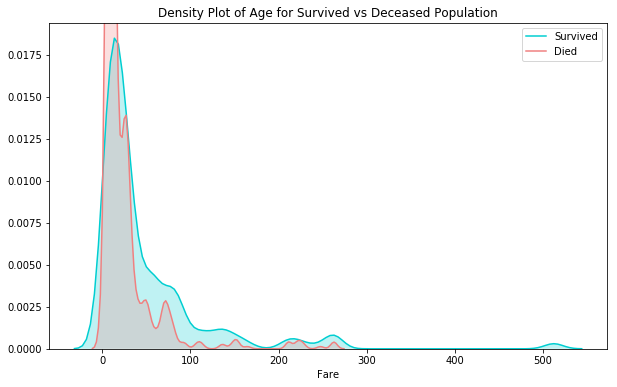

In [341]:
#plot age by survival status
plt.figure(figsize=(10,6))

ax = sns.kdeplot(df['fare'][df['survived'] == 1], #passengers that survived
                 color="darkturquoise",
                 shade=True)

sns.kdeplot(df['fare'][df['survived'] == 0], #passengers that did not survive
            color="lightcoral",
            shade=True)

plt.legend (['Survived', 'Died'])
plt.title("Density Plot of Age for Survived vs Deceased Population")

ax.set(xlabel='Fare')
#plt.show()